In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
density=df['density']

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

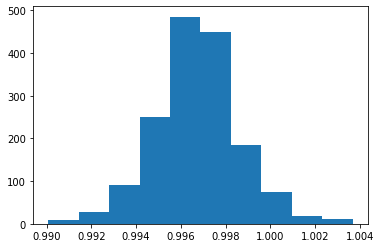

In [7]:
plt.hist(density)

/home/nadia/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide'>

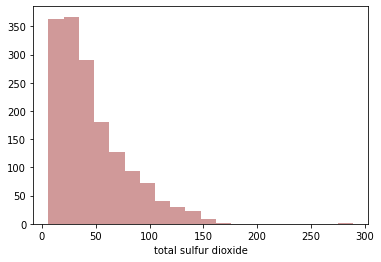

In [8]:
sns.distplot(df['total sulfur dioxide'].dropna(),kde=False,color='darkred', bins=20)

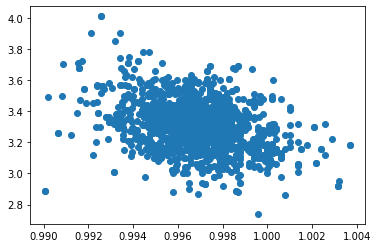

In [9]:
plt.scatter(df['density'],df['pH'])

In [10]:
#preprocessing
bins=(2,6.5,8)
class_label=["bad","good"]
df["quality"]=pd.cut(df["quality"],bins=bins, labels=class_label)
df["quality"].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [11]:
label_quality=LabelEncoder()

In [12]:
df["quality"]=label_quality.fit_transform(df["quality"])

In [13]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/home/nadia/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

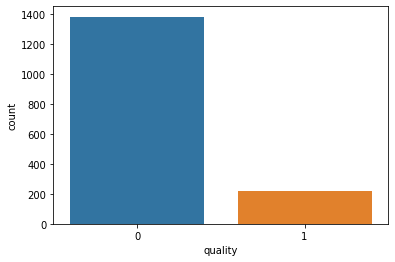

In [16]:
sns.countplot(df["quality"])

In [17]:
#split features from class label
X=df.drop("quality",axis=1)
y=df["quality"]

In [18]:
X.shape

(1599, 11)

In [19]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [20]:
#splitting data into training and testing data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=23)

In [21]:
#scalling the data to get optimized results 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
#Logistic Regression

In [23]:
logit=linear_model.LogisticRegression()

In [24]:
logit.fit(X_train,y_train)

LogisticRegression()

In [25]:
logit.score(X_test,y_test)

0.88125

In [26]:
logit_pred=logit.predict(X_test)

In [27]:
print(classification_report(y_test,logit_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       280
           1       0.55      0.30      0.39        40

    accuracy                           0.88       320
   macro avg       0.73      0.63      0.66       320
weighted avg       0.86      0.88      0.87       320



In [28]:
cm=confusion_matrix(y_test,logit_pred)
cm

array([[270,  10],
       [ 28,  12]])

Text(51.0, 0.5, 'Truth')

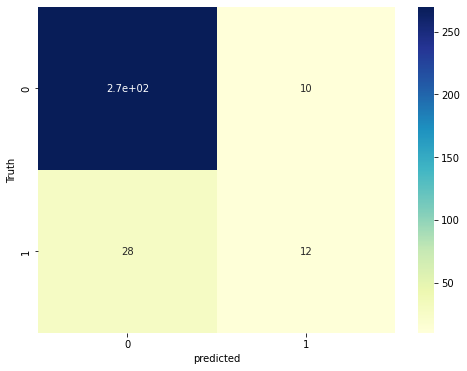

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, cmap="YlGnBu")
plt.xlabel('predicted')
plt.ylabel('Truth')

In [30]:
y_test.shape

(320,)

In [31]:
#!pip install scikit-plot

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

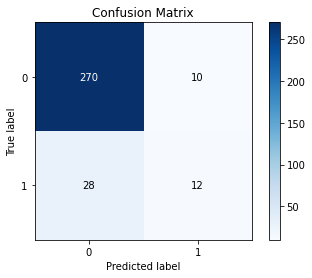

In [32]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix( y_test,logit_pred)

In [53]:
wml_credentials = {
                  "apikey":"5y7uPqk9N8P6bcuiesta3wie7DcjbBaq_CWvsz2FOq5x",
                  "url": "https://us-south.ml.cloud.ibm.com"
}

In [54]:
#!pip install -U ibm-watson-machine-learning

In [55]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [56]:
client.spaces.list(limit=10)

------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
c7fde189-9369-4f38-80da-5a116ccce556  Daisy  2022-10-28T17:49:13.430Z
0f250540-e376-4eca-ac1f-11ac983641db  wine   2022-10-28T10:00:11.569Z
------------------------------------  -----  ------------------------


In [57]:
space_id = 'c7fde189-9369-4f38-80da-5a116ccce556'

In [58]:
client.set.default_space(space_id)

'SUCCESS'

In [59]:
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [69]:
print(sofware_spec_uid)

12b83a17-24d8-5082-900f-0ab31fbfd3cb


In [70]:
metadata = {
            client.repository.ModelMetaNames.NAME: 'learning_space model',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

In [71]:
model=logit

In [72]:
published_model = client.repository.store_model(
    model=model,
    meta_props=metadata,
    training_data=X_train,
    training_target=y_train)

In [73]:
published_model

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'quality',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'},
      {'name': 'f10', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-10-28T17:56:42.664Z',
  'id': 'cc2db7e2-3ada-4cd2-8821-fabbdb2ca6ef',
  'modified_at': '2022-10-28T17:56:45.747Z',
  'name': 'learning_space model',
  'owner': 'IBMid-550004NG0G',
  'resource_key': '1d204ec7-19f7-40f9-afa1-295bff0be142'

In [74]:
import json

In [75]:
published_model_uid = client.repository.get_model_id(published_model)

In [76]:
model_details = client.repository.get_details(published_model_uid)

In [77]:
print(json.dumps(model_details, indent=2))

{
  "entity": {
    "hybrid_pipeline_software_specs": [],
    "label_column": "quality",
    "schemas": {
      "input": [
        {
          "fields": [
            {
              "name": "f0",
              "type": "float"
            },
            {
              "name": "f1",
              "type": "float"
            },
            {
              "name": "f2",
              "type": "float"
            },
            {
              "name": "f3",
              "type": "float"
            },
            {
              "name": "f4",
              "type": "float"
            },
            {
              "name": "f5",
              "type": "float"
            },
            {
              "name": "f6",
              "type": "float"
            },
            {
              "name": "f7",
              "type": "float"
            },
            {
              "name": "f8",
              "type": "float"
            },
            {
              "name": "f9",
              "type"

In [78]:
models_details = client.repository.list_models()

------------------------------------  --------------------  ------------------------  ----------------
ID                                    NAME                  CREATED                   TYPE
cc2db7e2-3ada-4cd2-8821-fabbdb2ca6ef  learning_space model  2022-10-28T17:56:42.002Z  scikit-learn_1.0
02438622-5a13-4925-8e17-814e9340047a  learning_space model  2022-10-28T17:56:13.002Z  scikit-learn_1.0
dcd1e567-cf46-4bf7-b8c5-b0d35d969acc  wines model           2022-10-28T17:55:34.002Z  scikit-learn_1.0
------------------------------------  --------------------  ------------------------  ----------------


In [80]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of scikit model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [81]:
#created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)

Deployment creation failed. Error: 504. <!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>


<title>us-south.ml.cloud.ibm.com | 504: Gateway time-out</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/main.css" />


</head>
<body>
<div id="cf-wrapper">

    

    <div id="cf-error-details" class="p-0">
        <header class="mx-auto pt-10 lg:pt-6 lg:px-8 w-240 lg:w-full mb-8">
            <h1 class="inline-block sm:block sm:mb-2 fon

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>


<title>us-south.ml.cloud.ibm.com | 504: Gateway time-out</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/main.css" />


</head>
<body>
<div id="cf-wrapper">

    

    <div id="cf-error-details" class="p-0">
        <header class="mx-auto pt-10 lg:pt-6 lg:px-8 w-240 lg:w-full mb-8">
            <h1 class="inline-block sm:block sm:mb-2 font-light text-60 lg:text-4xl text-black-d

WMLClientError: Deployment creation failed. Error: 504. <!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>


<title>us-south.ml.cloud.ibm.com | 504: Gateway time-out</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/main.css" />


</head>
<body>
<div id="cf-wrapper">

    

    <div id="cf-error-details" class="p-0">
        <header class="mx-auto pt-10 lg:pt-6 lg:px-8 w-240 lg:w-full mb-8">
            <h1 class="inline-block sm:block sm:mb-2 font-light text-60 lg:text-4xl text-black-dark leading-tight mr-2">
              
              <span class="inline-block">Gateway time-out</span>
              <span class="code-label">Error code 504</span>
            </h1>
            <div>
               Visit <a href="https://www.cloudflare.com/5xx-error-landing?utm_source=errorcode_504&utm_campaign=us-south.ml.cloud.ibm.com" target="_blank" rel="noopener noreferrer">cloudflare.com</a> for more information.
            </div>
            <div class="mt-3">2022-10-28 18:38:10 UTC</div>
        </header>
        
        <div class="my-8 bg-gradient-gray">
            <div class="w-240 lg:w-full mx-auto">
                <div class="clearfix md:px-8">
                  
<div id="cf-browser-status" class=" relative w-1/3 md:w-full py-15 md:p-0 md:py-8 md:text-left md:border-solid md:border-0 md:border-b md:border-gray-400 overflow-hidden float-left md:float-none text-center">
  <div class="relative mb-10 md:m-0">
    
    <span class="cf-icon-browser block md:hidden h-20 bg-center bg-no-repeat"></span>
    <span class="cf-icon-ok w-12 h-12 absolute left-1/2 md:left-auto md:right-0 md:top-0 -ml-6 -bottom-4"></span>
    
  </div>
  <span class="md:block w-full truncate">You</span>
  <h3 class="md:inline-block mt-3 md:mt-0 text-2xl text-gray-600 font-light leading-1.3">
    
    Browser
    
  </h3>
  <span class="leading-1.3 text-2xl text-green-success">Working</span>
</div>

<div id="cf-cloudflare-status" class=" relative w-1/3 md:w-full py-15 md:p-0 md:py-8 md:text-left md:border-solid md:border-0 md:border-b md:border-gray-400 overflow-hidden float-left md:float-none text-center">
  <div class="relative mb-10 md:m-0">
    <a href="https://www.cloudflare.com/5xx-error-landing?utm_source=errorcode_504&utm_campaign=us-south.ml.cloud.ibm.com" target="_blank" rel="noopener noreferrer">
    <span class="cf-icon-cloud block md:hidden h-20 bg-center bg-no-repeat"></span>
    <span class="cf-icon-ok w-12 h-12 absolute left-1/2 md:left-auto md:right-0 md:top-0 -ml-6 -bottom-4"></span>
    </a>
  </div>
  <span class="md:block w-full truncate">Nairobi</span>
  <h3 class="md:inline-block mt-3 md:mt-0 text-2xl text-gray-600 font-light leading-1.3">
    <a href="https://www.cloudflare.com/5xx-error-landing?utm_source=errorcode_504&utm_campaign=us-south.ml.cloud.ibm.com" target="_blank" rel="noopener noreferrer">
    Cloudflare
    </a>
  </h3>
  <span class="leading-1.3 text-2xl text-green-success">Working</span>
</div>

<div id="cf-host-status" class="cf-error-source relative w-1/3 md:w-full py-15 md:p-0 md:py-8 md:text-left md:border-solid md:border-0 md:border-b md:border-gray-400 overflow-hidden float-left md:float-none text-center">
  <div class="relative mb-10 md:m-0">
    
    <span class="cf-icon-server block md:hidden h-20 bg-center bg-no-repeat"></span>
    <span class="cf-icon-error w-12 h-12 absolute left-1/2 md:left-auto md:right-0 md:top-0 -ml-6 -bottom-4"></span>
    
  </div>
  <span class="md:block w-full truncate">us-south.ml.cloud.ibm.com</span>
  <h3 class="md:inline-block mt-3 md:mt-0 text-2xl text-gray-600 font-light leading-1.3">
    
    Host
    
  </h3>
  <span class="leading-1.3 text-2xl text-red-error">Error</span>
</div>

                </div>
              
            </div>
        </div>

        <div class="w-240 lg:w-full mx-auto mb-8 lg:px-8">
            <div class="clearfix">
                <div class="w-1/2 md:w-full float-left pr-6 md:pb-10 md:pr-0 leading-relaxed">
                    <h2 class="text-3xl font-normal leading-1.3 mb-4">What happened?</h2>
                    <p>The web server reported a gateway time-out error.</p>
                </div>
              
                <div class="w-1/2 md:w-full float-left leading-relaxed">
                    <h2 class="text-3xl font-normal leading-1.3 mb-4">What can I do?</h2>
                    <p class="mb-6">Please try again in a few minutes.</p>
                </div>
            </div>
              
        </div>

        <div class="cf-error-footer cf-wrapper w-240 lg:w-full py-10 sm:py-4 sm:px-8 mx-auto text-center sm:text-left border-solid border-0 border-t border-gray-300">
  <p class="text-13">
    <span class="cf-footer-item sm:block sm:mb-1">Cloudflare Ray ID: <strong class="font-semibold">7615c5062d12b196</strong></span>
    <span class="cf-footer-separator sm:hidden">&bull;</span>
    <span id="cf-footer-item-ip" class="cf-footer-item hidden sm:block sm:mb-1">
      Your IP:
      <button type="button" id="cf-footer-ip-reveal" class="cf-footer-ip-reveal-btn">Click to reveal</button>
      <span class="hidden" id="cf-footer-ip">41.90.65.81</span>
      <span class="cf-footer-separator sm:hidden">&bull;</span>
    </span>
    <span class="cf-footer-item sm:block sm:mb-1"><span>Performance &amp; security by</span> <a rel="noopener noreferrer" href="https://www.cloudflare.com/5xx-error-landing?utm_source=errorcode_504&utm_campaign=us-south.ml.cloud.ibm.com" id="brand_link" target="_blank">Cloudflare</a></span>
    
  </p>
  <script>(function(){function d(){var b=a.getElementById("cf-footer-item-ip"),c=a.getElementById("cf-footer-ip-reveal");b&&"classList"in b&&(b.classList.remove("hidden"),c.addEventListener("click",function(){c.classList.add("hidden");a.getElementById("cf-footer-ip").classList.remove("hidden")}))}var a=document;document.addEventListener&&a.addEventListener("DOMContentLoaded",d)})();</script>
</div><!-- /.error-footer -->


    </div>
</div>
</body>
</html>

